# Исследование надёжности заёмщиков <a id='intro'></a>

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** — проверить четыре гипотезы:

1. Есть зависимость между количеством детей у заемщиков и возвратом кредита в срок. Скорее всего, можно будет проследить взаимосвязь и между количеством детей и возвратом кредита в срок, потому что, с одной стороны, наличие ребенка может свидетельствовать о высокой степени ответственности человека (заемщика), т.к. раз он осознанно (будем надеяться, что осознанно) решился взять ответственность не только за свою жизнь, но и за жизнь ребенка, он более рассудительно подходит к вопросу финансов. С другой стороны, большое количество детей создает очень большую финансовую нагрузку, в таком случае еще стоит смотреть на уровень дохода.

2. Есть зависимость между семейным положением заемщика и возвратом кредита в срок. Несмотря на то, что создание семьи в наше время не требует особых усилий, есть стереотипное предположение о том, что у заемщиков, состоящих в браке выше вероятность возврата кредита в срок, т.к. наличие семьи опять же свидетельствует о более высоком уровне ответственности заемщика. Более того, не всегда, но есть такая вероятность, что наличие постоянного законного партнера у заемщика может снижать риск невозврата или несвоевременного возврата кредита за счет постоянного дохода такого партнера, в случае если заемщик потеряет работу или случится иной форс-мажор. 

3. Есть зависимость между уровнем дохода заемщика и возвратом кредита в срок. Чем выше уровень дохода, тем выше вероятность возврата кредита в срок. Хотя тут, возможно, нужно будет посмотреть не столько на общий уровень дохода заемщика, а на то, какая часть дохода у него ежемесячно уходит на погашение кредита, если эта часть составляет 1/3 и выше, то вероятность закрытия кредита в срок снижается.

4. Возможно, есть взаимосвязь между целью кредита и возвратом кредита в срок. Крайне косвенно, но цель кредита может отражать уровень общей финансовой граммотности заемщика и его умения обращаться с собственным бюджетом, учитывать риски и т.д. Хотя мне кажется, что с помощью данных эту гипотезу доказать будет сложно, тем более, что обстоятельства и мотивы у людей бывают очень разные.

**Ход исследования**

Гипотезы мы уже выдвинули. Дальнейшая часть исследования пройдет в 3 этапа:

- Обзор данных.
- Предобработка данных.
- Проверка гипотез.
- Формулировка выводов.

## Шаг 1. Откройте файл с данными и изучите общую информацию <a id='step_1'></a>

С помощью библиотеки pandas будем производить все действия с таблицами (а данные у нас представлены в таблице). Для этого ее ипортируем:

In [1]:
# импортируем библиотеку pandas
import pandas as pd

Откроем таблицу с общей информацией по клиентам. Файл с таблицей `data.csv` хранится в папке `/datasets`. Таблицу сохраним в переменной `df`.

In [2]:
# чтение файла с данными и сохранение в переменную df
df = pd.read_csv('/datasets/data.csv')

Выведем на экран первые 10 строк таблицы, чтобы визуально ознакомиться с наименованиями столбцов и значениями в ячейках.

In [3]:
# получение первых 10 строк таблицы df
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Также посмотрим общую информацию о таблице и формате данных.

In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице - двенадцать столбцов. 

Согласно документации к данным:

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

В названиях колонок нарушений стиля не выявлено: нет ни лишних проблелов, ни нарушения регистра. А вот к значениям есть вопросы: уже по первым 10 строчкам видно, что некоторые категориальные значения прописаны разным регистром, а числовые данные имеют вещественный вид, что в данном случае неудобно для анализа.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод** <a id='Step_1_conclusion'></a>

В каждой строке таблицы - информация о заемщике, его возрасте, доходе, семейном положении, образовании и т.д. Не все данные нам пригодятся для текущего анализа.

Исходя из беглого обзора данных таблицы, требуется предобработка данных:
- необходимо привести числовые данные к единому читаемому типу и формату;
- исключать дубликаты;
- исключить пропуски;
- исключить артефакты (отрицательные значения в стаже работы);
- и тд.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез, но чтобы двигаться дальше, нужно устранить проблемы в данных.

## Шаг 2. Предобработка данных

### Обработка пропусков и изменение типа данных

Посчитаем количество пропусков в данных.

In [5]:
# найдем количество пропусков с помощью методов pandas
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Как мы видим пропуски есть в столбце со стажем работы и общим доходом, данные там количественные и составляют 10% от всех данных таблицы, а значит их удаление может повлиять на результаты исследования.

Столбец с трудовым стажем `days_employed` нам не нужен для опровержения или доказательства выдвинутых гипотез, но он может понадобиться для заполнения пропущенных значений в столбце `dob_years`.

Но чтобы адекватно заполнить пропуски в столбце `days_employed`, следует очистить данные от артефактов и привести их в читаемый вид.

Насчет причины появления артефактов в данных сказать сложно, но могу допускать, что при форматировании файла (предположительно из excel) используемые формулы для расчета стажа работы, дали отрицательные значения. Т.е. скорее всего ошибка носит технический характер.

In [6]:
# избавимся от отрицательных значений в столбце 'days_employed'
df['days_employed'] = df['days_employed'].abs()

In [7]:
# выведем еще раз первые строки таблицы, чтобы убедиться, что отрицательных значений нет
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Артефактов больше нет.

Данные в столбце `days_employed` представляют собой вещественные числовые данные, с которым, во-первых, не очень удобно работать, во-вторых, в рамках данного исследования нас не особо интересует та часть, которая идет после запятой, поэтому предлагаем сразу привести значения столбца к типу  'int', заменив пропуски на 0.

Мы можем без зазрения совести заменить пропущенные значения на ноль, т.к. для дальнейшего исследования данные столбца `days_employed` нам не понадобятся.

In [9]:
# заполняем пропуски столбца 'days_employed' на 0
df['days_employed'] = df['days_employed'].fillna(0)

In [10]:
# переводим float в int
df['days_employed'] = df['days_employed'].astype('int')

Выбрали именно метод .astype('int), т.к. во-первых, мы имеем дело с данными float, во-вторых, нас в рамках проекта не интересуют значения после запятой, а так значения по-умолчанию округляются до целых.

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

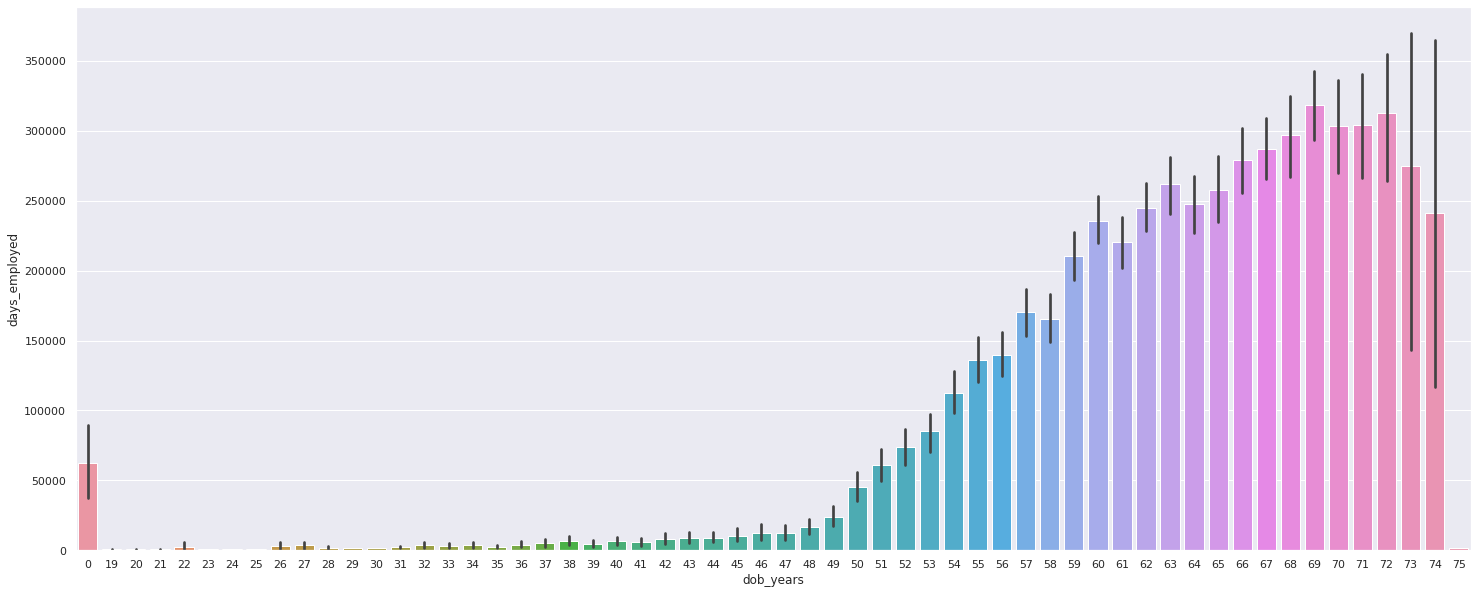

In [11]:
# построим столбчатую диаграмму, на которой по оси X отмечен возраст заемщиков, а по оси Y - трудовой стаж
import seaborn
seaborn.set(rc={'figure.figsize':(25,10)})
seaborn.barplot(x = df['dob_years'] , y = df['days_employed'])

По графику мы видим, что у нас присутствуют нереалистичные данные не только в столбце со стажем работы, но и с возрастом заемщиков, т.к. есть отметка возраста равная нулю.
Проверим, есть ли в столбце с возрастом заемщиков еще значения меньше 18 лет (мы предполагаем, что кредит может взять только совершеннолетний гражданин).

In [12]:
# находим уникальные значения столбца 'dob_years'
sorted(df['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

In [13]:
# выведем на экран строки таблицы, в которых возраст заещиков равен 0
min_age = df[df['dob_years'] == df['dob_years'].min()]
display(min_age)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,0,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье
20462,0,338734,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,331741,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,108,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


101 строка в таблице с данными заемщиков, чей возраст равен 0. К сожалению, по данным таблицы невозможно восстановить данные о возрасте заемщиков, т.к. на стаж работы мы не можем положиться при расчете предположительного возраста. К тому же 101 строка - менее 5% данных, которыми мы можем пренебречь.

In [14]:
#удаляем 101 строку, где возраст заемщика равен 0
df.drop(df[df["dob_years"] == 0].index, inplace=True)

Теперь займемся заполнением пропусков с толбце `total_income`. Единственные данные, которые мы можем взять в качестве основы для расчета предположительного дохода заемщиков - данные о способе дохода `income_type`, т.к. ни пол, ни возраст, ни стаж работы (который к тому же содержит не совсем корректные данные) не могут, к сожалению, стать отправной точкой для создания условий, определяющих заполнение пропусков теми или иными значениями.

Предлагаем заполнять пропуски в столбце с общим доходом медианным значением дохода среди заемщиков с одинаковым способом дохода.

In [15]:
#найдем уникальные значения столбца с типом занятости
sorted(df['income_type'].unique())

['безработный',
 'в декрете',
 'госслужащий',
 'компаньон',
 'пенсионер',
 'предприниматель',
 'сотрудник',
 'студент']

Предлагаем все-таки заполнить пропуски столбца `total_income` на типизированное значение меньше самого минимального значения данного столбца (ну чтобы исключить возможность ошибочного перезаписывания уже существующих значений). 

А заменить необходимо именно на числовое значение, чтобы у столбца тип данных сохранялся float или int.

In [16]:
#найдем минимальное значение
df['total_income'].min()

20667.26379327158

In [17]:
# создадим цикл для заполнения пропусков в столбце с `total_income` медианами дохода по перечисленным в данных видам занятости
for inc_type in df['income_type'].unique():
    median = df.loc[df['income_type'] == inc_type, 'total_income'].median()
    df.loc[(df['total_income'].isna()) & (df['income_type'] == inc_type), 'total_income'] = median

In [18]:
#заменим тип данных на int с помощью метода astype()
df['total_income'] = df['total_income'].astype('int')

Выбрали именно метод astype(), т.к. имеем дело с типом данном float в столбце, а также можем позволить себе округлить значения столбца.

In [19]:
#проверим наличие пропусков и тип данных столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21424 non-null  int64 
 1   days_employed     21424 non-null  int64 
 2   dob_years         21424 non-null  int64 
 3   education         21424 non-null  object
 4   education_id      21424 non-null  int64 
 5   family_status     21424 non-null  object
 6   family_status_id  21424 non-null  int64 
 7   gender            21424 non-null  object
 8   income_type       21424 non-null  object
 9   debt              21424 non-null  int64 
 10  total_income      21424 non-null  int64 
 11  purpose           21424 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


**Вывод**

В процессе предобработки пропусков были выявены следующие пропущенные значения в столбцах `total_income` и `days_employed`.

В процессе предобработки пришлось пожертвовать 101 строкой таблицы, так как данные в них не удалось восстановить, но 101 строка составляют менее 5% всей информации в таблице, поэтому это не повлияет на результаты исследования.

Скорее всего пропуски в данной выгрузке обусловлены случайностью и человеческим фактором, т.к. даже если заемщик утаивает от банка свои реальные доходы и стаж работы, он обязан предоставить хоть какие-то данные, подтвержденные хоть какой-то бумажкой, т.к. банк не заинтересован в том, чтобы выдавать деньги неплатежеспособным заемщикам, и внутринние процедуры всегда подразумевают сбор информации о трудовой жизни и доходах птенциального получателя займа.

Заполнили пропуски столбца `total_income` медианными значения дохода по типу дохода заемщиков, т.к. это были единственные данные, на которые можно было положиться в вычислении предположительного дохода заемщиков.

Пропуски в столбце `days_employed` решили не заполнять, т.к. во-первых, данные столбца бесполезны в рамках текущего исследования, во-вторых, в таблице недостаточно данных для восстановления значений даже предположительного стажа работы (отсутствует инфо по региону, сфере и месту работы в рамках одной сферы тоже есть различия по начисляемому стажу и зп, например, диспетчеры в аэропорту сталкиваются с меньшим коэффициентом вредного воздействия, чем наземные службы обслуживания воздушных судов и т.д.)

Также мы изменили тип данных столбцов `days_employed` и `total_income` на целочисленный методом .astype(), так как, во-первых, мы имели дело с данными float, во-вторых, нас в рамках проекта не интересуют значения после запятой, а так значения по-умолчанию округляются до целых. Округленные целочисленные значения визуально легче воспринимаются, чем вещественные числа с большим количеством знаков после запятой.

Тип данных столбца `total_income` мы конвертировали в целочисленный после заполнения пропусков медианами дохода соответствующих категорий, так как сам метод .median() подразумевает возможность получения значения типа float.

### Обработка дубликатов

Подсчитаем количество явных дубликатов в таблице:

In [20]:
# подсчёт явных дубликатов
df.duplicated().sum()

54

In [21]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

In [22]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

Теперь найдем неявные дубликаты в столбцах с категориальными значения (`education`, `family_status`, `income_type`, `purpose`). 

In [23]:
# найдем уникальные значения столбца с уровнем образования
sorted(df['education'].unique())

['ВЫСШЕЕ',
 'Высшее',
 'НАЧАЛЬНОЕ',
 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
 'Начальное',
 'Неоконченное высшее',
 'СРЕДНЕЕ',
 'Среднее',
 'УЧЕНАЯ СТЕПЕНЬ',
 'Ученая степень',
 'высшее',
 'начальное',
 'неоконченное высшее',
 'среднее',
 'ученая степень']

Как мы видим, столбец содержит неявные дубликаты: многие значения полностью идентичны по своему значению, но записаны разным регистром. Это может усложнить работу с таблицей, поэтому приведем все значения столбца к общему виду с помощью метода str.lower().

In [24]:
# приводим все значения к нижнему регистру
df['education'] = df['education'].str.lower()

In [25]:
# проверим теперь уникальные значения
sorted(df['education'].unique())

['высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']

Неявных дубликатов больше нет. Теперь снова необходимо проверить данные на наличие явных дубликатов.

In [26]:
# подсчёт явных дубликатов
df.duplicated().sum()

17

In [27]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

In [28]:
# найдем уникальные значения столбца с семейным положением
sorted(df['family_status'].unique())

['Не женат / не замужем',
 'в разводе',
 'вдовец / вдова',
 'гражданский брак',
 'женат / замужем']

В данном столбце неявных дубликатов нет.

In [29]:
# найдем уникальные значения столбца с типом дохода
sorted(df['income_type'].unique())

['безработный',
 'в декрете',
 'госслужащий',
 'компаньон',
 'пенсионер',
 'предприниматель',
 'сотрудник',
 'студент']

Неявных дубликатов нет.

In [30]:
# найдем уникальные значения столбца с целью кредита
df['purpose'].value_counts()

свадьба                                   786
на проведение свадьбы                     764
сыграть свадьбу                           760
операции с недвижимостью                  672
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   649
операции с коммерческой недвижимостью     648
операции с жильем                         646
покупка жилья                             640
жилье                                     640
покупка жилья для семьи                   637
строительство собственной недвижимости    633
недвижимость                              629
операции со своей недвижимостью           627
строительство жилой недвижимости          621
строительство недвижимости                619
покупка своего жилья                      619
покупка недвижимости                      618
ремонт жилью                              605
покупка жилой недвижимости                603
на покупку своего автомобиля              502
заняться высшим образованием      

Уникальных значений, конечно, много, но все они не уникальны, большинство из них объединяет какая-то общая тематика: недвижимость, свадьба, автомобиль, образование, строительство и ремонт. Поэтому в следующем разделе предобработки данных предлагаем с помощью лемматизации разбить цели кредитов на 6 вышеупомянутых категории.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21353 non-null  int64 
 1   days_employed     21353 non-null  int64 
 2   dob_years         21353 non-null  int64 
 3   education         21353 non-null  object
 4   education_id      21353 non-null  int64 
 5   family_status     21353 non-null  object
 6   family_status_id  21353 non-null  int64 
 7   gender            21353 non-null  object
 8   income_type       21353 non-null  object
 9   debt              21353 non-null  int64 
 10  total_income      21353 non-null  int64 
 11  purpose           21353 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

Во время предобработки данных были выявлены явные и неявные дубликаты, которые могут быть обусловлены человеческим фактором (скорее всего значения категориальных переменных вводились вручную по каждому клиенту, соответственно, несмотря на то, что информативно данные сообщают +- одно и то же, но единообразия в них нет.

Явные дубликаты просто удаляли, т.к. наличие явных дубликатов не добавит исследованию достоверности.

Неявные дубликаты исключали с помощью поиска уникальных значений в столбцах и приведению всех значений к единому стилю.

Сейчас ни явных, ни неявных дубликатов нет, осталось только решить проблему со столбцом `purpose`.

### Лемматизация

Выделим в столбце с целью кредита шесть общих категорий, которые мы указали выше.

Будем это выполнять с помощью функции, которая ищет соответствующую смысловую лемму в лемматизированной ячейке столбца `purpose`.

Иными словами, мы приведем все слова в нужных ячейках солбца `purpose` к начальным формам, чтобы упростить поиск и вместо всех возможных словоформ парадигмы использовать для фильтрации данных и классификации заемщиков всего одну начальную форму.

In [32]:
# импортируем pymystem3 (Одна из библиотек с функцией лемматизации на русском языке):
from pymystem3 import Mystem
m = Mystem() 

In [33]:
# объявим функцию, которая будет искать соотвутствующую лемму в каждой строке таблице по столбцу с данными о цели кредита
# внутри функции лемматизируем значения соответствующей ячейки

def purpose_category(row):
    purpose = row['purpose']
    purpose_lemmatized = m.lemmatize(purpose)
    if (('недвижимость' in purpose_lemmatized) or ('жилье' in purpose_lemmatized)) and (('строительство' or 'ремонт') not in purpose_lemmatized):
        return 'недвижимость'
    if 'ремонт' in purpose_lemmatized:
        return 'ремонт'
    if 'свадьба' in purpose_lemmatized:
        return 'свадьба'
    if 'образование' in purpose_lemmatized:
        return 'образование'
    if 'автомобиль' in purpose_lemmatized:
        return 'автокредит'
    if 'строительство' in purpose_lemmatized:
        return 'строительство'  
    

Было решено выделить именно 6 групп в целях кредита, т.к. по нашей теории, если между целью и просрочками по кредитам действительно есть корреляция, то эта корреляция должна быть связано с рентабельностью самих целей. Авто, ремонт (только не в том случае, если это косметический ремонт перед сдачей квартиры в аренду) и свадьба - самые нерентабельные цели для кредита.

Со строительством уже сложнее, но все же мы решили операции с недвижимостью поделить на ремонт, покупку готовой недвижимости (и коммерческой и некоммерческой, в любом случае хорошо) и строительство недвижимости. Строительство - это больше про вложение частями, плюс это сложнее в плане получения прибыли и покрытия расходов (зависит от ситуации, но в большинстве случае). 

Поэтому предварительно среди рентабельных целей кредита мы выделили недвижимость и образование. С натяжкой строительство.

In [34]:
# добавим в таблицу новый столбец, где указана категория цели кредита. Столбец создается на основе применения функции
# 'purpose_category' к столбцу 'purpose'
df['purpose_category'] = df.apply(purpose_category, axis=1)

In [35]:
# посмотрим значения нового столбца и кол-во этих значений
df['purpose_category'].value_counts()

недвижимость     8891
автокредит       4284
образование      3995
свадьба          2310
строительство    1873
Name: purpose_category, dtype: int64

**Вывод**

Теперь с помощью анализа лемм в цели кредита функция построчно отсортировала заемщиков в 6 разных категорий.

Введение категорий цели упорядочит дальнейший анализ данных.

### Категоризация данных

В предыдущем пункте предобработки данных мы уже ввели новую категорию - `purpose_category`. 

Также для дальнейшей работы сданными предлагаем выделить пять категорий заемщиков по уровню общего дохода: низкий доход, доход ниже среднего, средний доход, доход выше среднего, высокий доход.

Разделим заемщиков по категориям дахода мы с помощью метода `pd.qcut`. `qcut` делит сходные данные на равные в процентном соотношении интервалы.

In [36]:
# зададим названия для пяти новых категорий дохода
category_labels = ['низкий доход', 'доход ниже среднего', 'средний доход', 'доход выше среднего', 'высокий доход']
# применим qcut к столбцу с общим доходом, чтобы выделить пять равных интервалов. Запишем все в новый столбец таблицы
df['total_income_category'] = pd.qcut(df['total_income'], q=[0, .2, .4, .6, .8, 1], labels=category_labels)

Также неплохо было бы создать категории по наличию детей в семье.

Для начала посмотрим, какие есть значения в данном столбце.

In [37]:
# выведем на экран все уникальные значения столбца и частоту их встречаемости в таблице
df['children'].value_counts()

 0     14022
 1      4792
 2      2039
 3       328
 20       75
-1        47
 4        41
 5         9
Name: children, dtype: int64

Как мы видим, тут тоже есть случайные ошибки, которые были пропущены раннее, т.к. наврядли у нас так много семей с 20 детьми, а тем более с -1 ребенком. 

Под 20 детьми, скорее всего, имелось в виду 2 ребенка (в нынешней экономической обстановке мало кто решится на такой эксперимент), а под -1 - только один ребенок. 

Произведем необходимые изменения.

In [38]:
# избавимся от артефактов в виде -
df['children'] = df['children'].abs()

In [39]:
# заменим нереалистичное 20 на вполне себе реалистичное 2
df.loc[(df['children'] == 20), 'children'] = 2

In [40]:
#снова выведем значения столбца
df['children'].value_counts()

0    14022
1     4839
2     2114
3      328
4       41
5        9
Name: children, dtype: int64

Выделим две группы - без детей и с детьми.

In [41]:
# объявим функцию children_num_category, которая разделит заемщиков на 3 категории в соответствии с кол-вом детей

def children_num_category(children):
    if children == 0:
        return 'нет детей'
    if 1 <= children :
        return 'есть дети'

In [42]:
# создадим новый столбей с категориями заемщиков по кол-ву детей, который заполним значениями с помощью применения функции

df['children_num_category'] = df['children'].apply(children_num_category)

Еще нужна категория для статуса наличия/отсутствия просрочки по кредиту, т.к. мы, например знаем, что 0 - отсутствие задолженности, а 1 - ее наличие, но в сводной таблице такой подход может повлиять на наглядность и доступность результата исследования.

In [43]:
# объявим функцию, которая определит категорию заемщика исходя из наличия или отсутствия просрочки по кредиту

def debt_status(debt):
    if debt == 0:
        return 'задолженности нет'
    if debt == 1:
        return 'есть задолженность'

In [44]:
# создадим новый столбец, в который сохраним категории. Классифицируем заемщиков с помощью функции выше по столбцу 'debt'
df['debt_status'] = df['debt'].apply(debt_status)

**Вывод**

Таким образом для облегчения и упорядычевания дальнейшей работы с данными и подверждения/опровержения первоначальных гипотез мы ввели в таблицу 4 дополнительных категорий, в которых заемщики делятся на основании их дохода, цели кредита, наличию детей и  наличию задолженности.

Предполагаем, что такое разделение не только упростит нам работу при анализе, но облегчит понимание результатов исследования для неподготовленного конечного потребителя.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для нахождения ответа на первый вопрос предлагаем построить свобную таблицу, где строки - категории заемщиков по кол-ву детей, а столбцы - информация о задолженности.

In [45]:
# создаем сводную таблицу для получения наглядной информации о наличии/отсутствии корреляции
chldrn_n_debt_correlation_tbl = df.pivot_table(index='children_num_category', columns='debt_status', values='debt', aggfunc='count')

In [46]:
# выводим таблицу на экран
display(chldrn_n_debt_correlation_tbl)

debt_status,есть задолженность,задолженности нет
children_num_category,,
есть дети,675,6656
нет детей,1058,12964


Предлагаем также найти отношение кол-ва заемщиков с задолженностью к кол-ву заемщиков без задолженности в каждой категории. Для этого разделим данные первого столбца на данные второго столбца, а результат занесем в новый столбец сводной таблицы.

In [47]:
# добавим новый столбец 'ratio' с отношением двух столбцов
chldrn_n_debt_correlation_tbl['ratio'] = chldrn_n_debt_correlation_tbl['есть задолженность'] / chldrn_n_debt_correlation_tbl['задолженности нет']

In [48]:
# выведем результат на экран
display(chldrn_n_debt_correlation_tbl)

debt_status,есть задолженность,задолженности нет,ratio
children_num_category,,,
есть дети,675,6656,0.101412
нет детей,1058,12964,0.081611


Уже по сводной таблице видим, что у заемщиков с детьми - больше проблем со своевременным возвратом кредитов в срок. Но давайте также найдем процентное соотношение заемщиков с просрочками в обеих группах.

In [49]:
#посчитаем процентное соотношение заемщиков с просрочками (будем использовать именно числа из сводной таблицы, т.к. это быстрее,
# чем строить формулы с длинными названиями столбцов)

debtors_with_children_n_with_debt_part = 674 / (674 + 6611)
debtors_without_children_n_with_debt_part = 1058 / (1058 + 12980)

print(f'Процент просрочек по кредитам среди заемщиков с детьми составляет {debtors_with_children_n_with_debt_part:.2%}')
print(f'Процент просрочек по кредитам среди заемщиков без детей составляет {debtors_without_children_n_with_debt_part:.2%}')

Процент просрочек по кредитам среди заемщиков с детьми составляет 9.25%
Процент просрочек по кредитам среди заемщиков без детей составляет 7.54%


Как мы видим, заещики с детьми чаще нарушают сроки выплаты по кредиту. Однако разница между группами не так велика.

**Вывод**

По данным, приведенным в таблице, можно сказать, что наличие детей влияет на возврат кредита в срок. Наличие детей повышает вероятность невозврата кредита в срок.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Также построим сводную таблицу, где строки - категории заемщиков, выделенные по их семейному положению, столбцы - информация о задолженности.

In [50]:
# создаем сводную таблицу для получения наглядной информации о наличии/отсутствии корреляции
family_status_n_debt_correlation = df.pivot_table(index='family_status', columns='debt_status', values='debt', aggfunc='count')

In [51]:
# выводим таблицу на экран
display(family_status_n_debt_correlation)

debt_status,есть задолженность,задолженности нет
family_status,,
Не женат / не замужем,273,2521
в разводе,85,1100
вдовец / вдова,62,892
гражданский брак,386,3744
женат / замужем,927,11363


Предлагаем также найти отношение кол-ва заемщиков с задолженностью к кол-ву заемщиков без задолженности в каждой категории. Для этого разделим данные первого столбца на данные второго столбца, а результат занесем в новый столбец сводной таблицы.

In [52]:
# добавим новый столбец 'ratio' с отношением двух столбцов
family_status_n_debt_correlation['ratio'] = family_status_n_debt_correlation['есть задолженность'] / family_status_n_debt_correlation['задолженности нет']

In [53]:
# выведем результат на экран
display(family_status_n_debt_correlation)

debt_status,есть задолженность,задолженности нет,ratio
family_status,,,
Не женат / не замужем,273,2521,0.108290
в разводе,85,1100,0.077273
вдовец / вдова,62,892,0.069507
гражданский брак,386,3744,0.103098
женат / замужем,927,11363,0.081581


Уже по сводной таблице видим, что среди незамужних/неженатых заемщиков и заемщиков, состоящих в гражданском браке, дела с возвратом кредитов в срок обстоят несколько хуже. Но предлагаем найти процент просрочек в каждой группе заемщиков.

In [54]:
#посчитаем процентное соотношение заемщиков с просрочками (будем использовать именно числа из сводной таблицы, т.к. это быстрее,
# чем строить формулы с длинными названиями столбцов)

single_n_debt = 274 / (2535 + 274)
married_n_debt = 931 / (931 + 11404)
divorced_n_debt = 85 / (85 + 1110)
widower_n_debt = 63 / (63 + 896)
cohabitation_n_debt = 388 / (388 + 3760)

print(f'Процент просрочек по кредитам среди неженатых/незамужних заемщиков составляет {single_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди разведенных заемщиков составляет {divorced_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди заемщиков-вдовцов составляет {widower_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди заемщиков в гражданском браке составляет {cohabitation_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди женатых/замужних заемщиков составляет {married_n_debt:.2%}')

Процент просрочек по кредитам среди неженатых/незамужних заемщиков составляет 9.75%
Процент просрочек по кредитам среди разведенных заемщиков составляет 7.11%
Процент просрочек по кредитам среди заемщиков-вдовцов составляет 6.57%
Процент просрочек по кредитам среди заемщиков в гражданском браке составляет 9.35%
Процент просрочек по кредитам среди женатых/замужних заемщиков составляет 7.55%


Опять же из данных таблицы мы видим, что заемщики, не состоящие в законном браке, безответственнее относятся к выплате кредита в срок.

**Вывод**

По данным таблицы можно сказать, что есть небольшая взаимосвязь между семейным положением и возвратом кредита в срок.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Построим сводную таблицу, где строки - категории заемщиков, выделенные по их уровню дохода, столбцы - информация о задолженности.

In [55]:
# создаем сводную таблицу для получения наглядной информации о наличии/отсутствии корреляции
# и выведем ее на экран
ttl_income_n_debt_correlation = df.pivot_table(index='total_income_category', columns='debt_status', values='debt', aggfunc='count')
display(ttl_income_n_debt_correlation)

debt_status,есть задолженность,задолженности нет
total_income_category,,
низкий доход,343,3928
доход ниже среднего,358,3913
средний доход,374,3896
доход выше среднего,359,3911
высокий доход,299,3972


Найдем отношение кол-ва заемщиков с задолженностью к кол-ву заемщиков без задолженности в каждой категории. Для этого разделим данные первого столбца на данные второго столбца, а результат занесем в новый столбец сводной таблицы.

In [56]:
# добавим новый столбец 'ratio' с отношением двух столбцов
ttl_income_n_debt_correlation['ratio'] = ttl_income_n_debt_correlation['есть задолженность'] / ttl_income_n_debt_correlation['задолженности нет']
# и выведем результат на экран
display(ttl_income_n_debt_correlation)

debt_status,есть задолженность,задолженности нет,ratio
total_income_category,,,
низкий доход,343,3928,0.087322
доход ниже среднего,358,3913,0.091490
средний доход,374,3896,0.095996
доход выше среднего,359,3911,0.091792
высокий доход,299,3972,0.075277


Уже по сводной таблице видим, что среди заемщиков со средним доходом и доходом выше среднего дела с возвратом кредитов в срок обстоят несколько хуже. Но предлагаем найти процент просрочек в каждой группе заемщиков.

In [57]:
#посчитаем процентное соотношение заемщиков с просрочками (будем использовать именно числа из сводной таблицы, т.к. это быстрее,
# чем строить формулы с длинными названиями столбцов)

poor_n_debt = 344 / (344 + 3946)
not_so_poor_n_debt = 347 / (347 + 3942)
not_poor_not_rich_n_debt = 380 / (380 + 3909)
lttl_bit_less_than_rich_n_debt = 370 / (370 + 3909)
rich_n_debt = 300 / (300 + 3989)

print(f'Процент просрочек по кредитам среди заемщиков с низким доходом составляет {poor_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди заемщиков с доходом ниже среднего составляет {not_so_poor_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди заемщиков со средним доходом составляет {not_poor_not_rich_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди заемщиков с доходом выше среднего составляет {lttl_bit_less_than_rich_n_debt:.2%}')
print(f'Процент просрочек по кредитам среди заемщиков с высоким доходом составляет {rich_n_debt:.2%}')

Процент просрочек по кредитам среди заемщиков с низким доходом составляет 8.02%
Процент просрочек по кредитам среди заемщиков с доходом ниже среднего составляет 8.09%
Процент просрочек по кредитам среди заемщиков со средним доходом составляет 8.86%
Процент просрочек по кредитам среди заемщиков с доходом выше среднего составляет 8.65%
Процент просрочек по кредитам среди заемщиков с высоким доходом составляет 6.99%


Проценты говорят, что меньше всего просрочек среди заемщиков с высоким доходом. У заемщиков с низким доходом и доходом ниже среднего с возвратом чуть лучше, чем у заемщиков со средним доходом и доходов выше среднего.

**Вывод**

Есть небольшая взаимосвязь между уровнем дохода и возватом кредита в срок.

- Как разные цели кредита влияют на его возврат в срок?

Построим сводную таблицу, где строки - категории заемщиков, выделенные по их целям на кредит, столбцы - информация о задолженности.

In [58]:
# создаем сводную таблицу для получения наглядной информации о наличии/отсутствии корреляции
# и выведем ее на экран
purpose_n_debt_correlation = df.pivot_table(index='purpose_category', columns='debt_status', values='debt', aggfunc='count')
display(purpose_n_debt_correlation)

debt_status,есть задолженность,задолженности нет
purpose_category,,
автокредит,400,3884
недвижимость,635,8256
образование,370,3625
свадьба,184,2126
строительство,144,1729


Найдем отношение кол-ва заемщиков с задолженностью к кол-ву заемщиков без задолженности в каждой категории. Для этого разделим данные первого столбца на данные второго столбца, а результат занесем в новый столбец сводной таблицы.

In [59]:
# добавим новый столбец 'ratio' с отношением двух столбцов
purpose_n_debt_correlation['ratio'] = purpose_n_debt_correlation['есть задолженность'] / purpose_n_debt_correlation['задолженности нет']
# и выведем результат на экран
display(purpose_n_debt_correlation)

debt_status,есть задолженность,задолженности нет,ratio
purpose_category,,,
автокредит,400,3884,0.102987
недвижимость,635,8256,0.076914
образование,370,3625,0.102069
свадьба,184,2126,0.086548
строительство,144,1729,0.083285


По таблице мы видим, что коэффициент задолженности выше у тех заемщиков, кто берут кредиты на покупку автомобиля и получение образования, но опять же этот коэффициент слишком незначителен. Предлагаем также найти процент просрочек для каждой категории целей кредита.

In [60]:
#посчитаем процентное соотношение заемщиков с просрочками (будем использовать именно числа из сводной таблицы, т.к. это быстрее,
# чем строить формулы с длинными названиями столбцов)

car_n_debt = 403 / (403 + 3903)
real_estate_n_debt = 603 / (603 + 7717)
education_n_debt = 370 / (370 + 3643)
repairs_n_debt = 35 / (35 + 571)
wedding_n_debt = 186 / (186 + 2137)
contsruction_n_debt = 144 / (144 + 1734)

print(f'Процент просрочек по кредитам, взятым на покупку автомобиля, составляет {car_n_debt:.2%}')
print(f'Процент просрочек по кредитам, взятых на покупку недвижимости, составляет {real_estate_n_debt:.2%}')
print(f'Процент просрочек по кредитам, взятым на получение образования, составляет {education_n_debt:.2%}')
print(f'Процент просрочек по кредитам, взятым на ремонт, составляет {repairs_n_debt:.2%}')
print(f'Процент просрочек по кредитам, взятым на свадьбу, составляет {wedding_n_debt:.2%}')
print(f'Процент просрочек по кредитам, взятым на строительство дома, составляет {contsruction_n_debt:.2%}')

Процент просрочек по кредитам, взятым на покупку автомобиля, составляет 9.36%
Процент просрочек по кредитам, взятых на покупку недвижимости, составляет 7.25%
Процент просрочек по кредитам, взятым на получение образования, составляет 9.22%
Процент просрочек по кредитам, взятым на ремонт, составляет 5.78%
Процент просрочек по кредитам, взятым на свадьбу, составляет 8.01%
Процент просрочек по кредитам, взятым на строительство дома, составляет 7.67%


Самый высокий процент просрочек по кредитам на авто и образование. Третье место - у свадеб.

**Вывод**

Возможно, есть взаимосвязь между целью кредита и возвратом кредита в срок, а возможно, это просто статистическая погрешность.

## Шаг 4. Общий вывод

В рамках данного исследования перед нами стояла задача подтвердить 4 гипотезы относительно взаимосвязи некоторых фактов биографии жизни заемщика и возвратом его кредита в срок:

**1. Есть ли взаимосвязь между количеством детей и возвратом кредита в срок?**

Гипотеза частично подтверждается значением коэффициента корреляции фактора и задолженности: заемщики с детьми чаще нарушают срок оплаты, чем земщики, у которых нет детей.

*Однако коэффициент корреляции слишком уж невелик, чтобы заявлять о том, что это решающая взаимосвязь, которую стоит ставить в топ критериев при скоринге потенциальных заемщиков.*

**2. Есть ли взаимосвязь между семейным статусом заемщика и возвратом кредита в срок?**

Гипотеза тоже частично подтвердилась, люди семейные или хотя бы уже бывшие в браке и познавшие груз ответственности чаще выплачивают кредит в срок.

*Однако коэффициент корреляции слишком уж невелик, чтобы заявлять о том, что это решающая взаимосвязь, которую стоит ставить в топ критериев при скоринге потенциальных заемщиков.*

**3. Есть ли взаимосвязь между уровнем дохода и возвратом кредита в срок?**

Гипотеза не подтвердилась. Исходя из данных таблицы уровень дохода особо не влияет на наличие или отсутствие задолженности. Да, среди заемщиков с высоким доходом самый маленький процент просрочек, но вот среди заемщиков с доходом средним и выше среднего процент просрочек выше, чем у других.

**4. Есть ли взаимосвязь между целью кредита и возвратом кредита в срок?**

Можно сказать, что наша гипотеза не подтвердилась, потому что по нашим ожиданиям заемщики, берущие кредит на свадьбу, ремонт и автомобиль, реже выплачивают кредит в срок, а заемщики, берущие кредит на недвижимость и образование - чаще. Но судя по данным, самые ответственные и надежные в этом плане - те, кто планирует ремонт.

*Однако коэффициент корреляции слишком уж невелик, чтобы заявлять о том, что это решающая взаимосвязь, которую стоит ставить в топ критериев при скоринге потенциальных заемщиков.*
